# FUZZY JOB ROLE SALARY

IMPORT LIBRARY
---

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

DATASET
---

In [341]:
dataset_salary = pd.read_csv("Salary.csv")
pd.DataFrame(dataset_salary)

,ID,Role,Years Experience,Salary(in dollar),Worth?
0,ID001,Account Executive,2,510,?
1,ID002,Account Manager,1,401,?
2,ID003,Account Support Specialist,1,360,?
3,ID004,Administration,2,306,?
4,ID005,Android Developer,4,374,?
...,...,...,...,...,...
116,ID117,UI Designer,1,442,?
117,ID118,UX Engineer,2,612,?
118,ID119,UX researcher,1,646,?
119,ID120,Video Editor,2,544,?


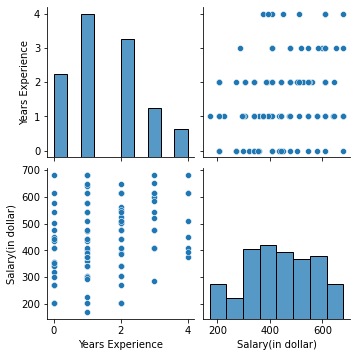

In [342]:
sns.pairplot(dataset_salary)

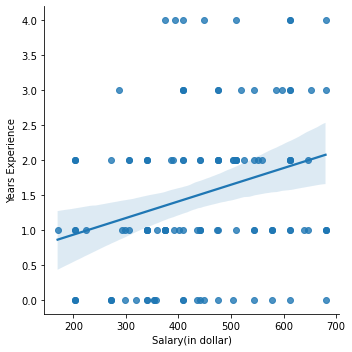

In [343]:
sns.lmplot(data=dataset_salary, x='Salary(in dollar)', y='Years Experience')

In [344]:
dataset_salary.columns

Index(['ID', 'Role', 'Years Experience', 'Salary(in dollar)', 'Worth?'], dtype='object')

In [345]:
X = dataset_salary['Years Experience']

In [346]:
y = dataset_salary['Salary(in dollar)']

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [348]:
pd.merge(left=X_train,right=y_train,left_index=True, right_index=True)

,Years Experience,Salary(in dollar)
0,2,510
1,1,401
2,1,360
3,2,306
4,4,374
...,...,...
91,2,510
92,1,299
93,2,442
94,2,646


In [349]:
pd.merge(left=X_test,right=y_test,left_index=True, right_index=True)

,Years Experience,Salary(in dollar)
96,2,385
97,4,449
98,1,442
99,2,476
100,1,292
101,3,520
102,2,551
103,2,204
104,0,357
105,2,476


In [350]:
data_role = np.array(dataset_salary)
data_role = data_role [:,[0,1]]
pd.DataFrame(data_role)

,0,1
0,ID001,Account Executive
1,ID002,Account Manager
2,ID003,Account Support Specialist
3,ID004,Administration
4,ID005,Android Developer
...,...,...
116,ID117,UI Designer
117,ID118,UX Engineer
118,ID119,UX researcher
119,ID120,Video Editor


In [351]:
train_exp = np.array(X_train)
pd.DataFrame(train_exp)

,0
0,2
1,1
2,1
3,2
4,4
...,...
91,2
92,1
93,2
94,2


In [352]:
train_salary = np.array(y_train)
pd.DataFrame(train_salary)

,0
0,510
1,401
2,360
3,306
4,374
...,...
91,510
92,299
93,442
94,646


In [353]:
role = {}
for i in range (1, data_role[0:,1].size + 1):
    role['role%02d' % i] = np.sum(data_role[i-1:i,1])
    
pd.DataFrame([role]) 

,role01,role02,role03,role04,role05,role06,role07,role08,role09,role10,...,role112,role113,role114,role115,role116,role117,role118,role119,role120,role121
0,Account Executive,Account Manager,Account Support Specialist,Administration,Android Developer,Android Engineer,Application Developer,Apps Developer,Associate Product Manager,Associate Research Executive (Market Research),...,Technical Auditor,Technical Consultant,Technical Lead,Test Engineer,UI / UX Designer,UI Designer,UX Engineer,UX researcher,Video Editor,Web Developer


In [354]:
trexp = {}
for i in range (1, train_exp.size + 1):
    trexp['trexp%02d' % i] = np.sum(train_exp[i-1])
    
pd.DataFrame([trexp])

,trexp01,trexp02,trexp03,trexp04,trexp05,trexp06,trexp07,trexp08,trexp09,trexp10,...,trexp87,trexp88,trexp89,trexp90,trexp91,trexp92,trexp93,trexp94,trexp95,trexp96
0,2,1,1,2,4,0,3,1,2,1,...,0,2,2,1,2,2,1,2,2,2


In [355]:
trsalary = {}
for i in range (1, train_salary.size + 1):
    trsalary['trsalary%02d' % i] = np.sum(train_salary[i-1]) 
    
pd.DataFrame([trsalary])

,trsalary01,trsalary02,trsalary03,trsalary04,trsalary05,trsalary06,trsalary07,trsalary08,trsalary09,trsalary10,...,trsalary87,trsalary88,trsalary89,trsalary90,trsalary91,trsalary92,trsalary93,trsalary94,trsalary95,trsalary96
0,510,401,360,306,374,272,598,639,204,374,...,340,476,503,340,340,510,299,442,646,340


MODEL FUZZY
---

In [356]:
def rangeSubject (_low, _high, _step):
    subject = np.arange(_low, _high, _step)
    return subject

def fuzzySalary(_rule, _range_subject, _title, _xlabel):
    lo = fuzz.trimf(_range_subject, _rule[0])
    mi = fuzz.trimf(_range_subject, _rule[1])
    hi = fuzz.trimf(_range_subject, _rule[2])
    
    fig, ax = plt.subplots(1, figsize=(12, 6))
    ax.plot(_range_subject, lo, 'g', label = 'LOW')
    ax.plot(_range_subject, mi, 'b', label = 'AVERAGE')
    ax.plot(_range_subject, hi, 'r', label = 'HIGH')
    
    
    ax.set_title(_title)
    ax.set_xlabel(_xlabel)
    ax.legend()
    
    
    plt.tight_layout()
    return lo,mi,hi

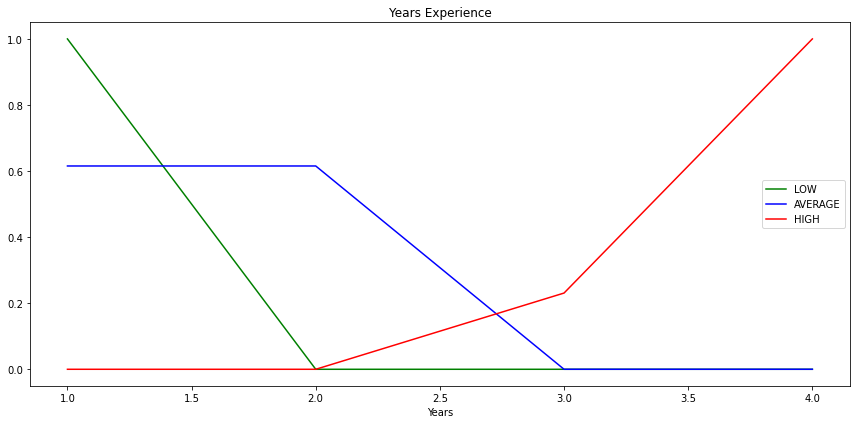

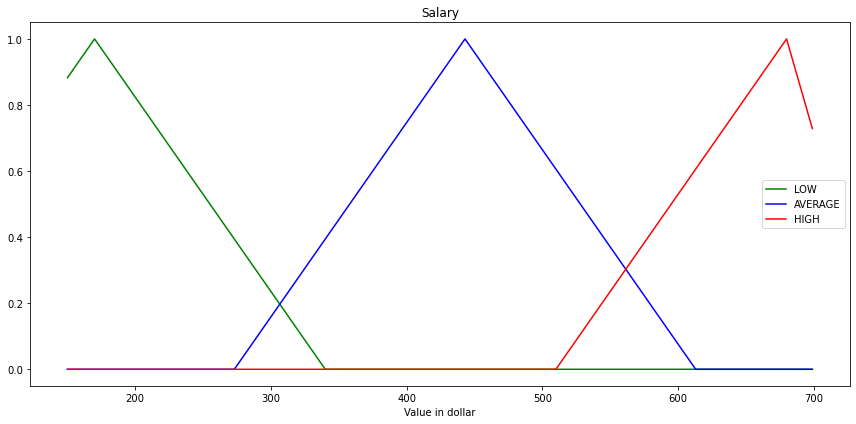

In [357]:
x_exp = rangeSubject(1,5,1)
r_exp = np.array([
    [0,1,1.3],[0.2,1.5,2.8],[2.7,4,5]
])

x_salary = rangeSubject(150,700,1)
r_salary = np.array([
    [0,170,340],[273,443,613],[510,680,750]
])

lo_exp, mi_exp, hi_exp = fuzzySalary(r_exp, x_exp, 'Years Experience','Years')
lo_salary, mi_salary, hi_salary = fuzzySalary(r_salary, x_salary, 'Salary','Value in dollar')

In [358]:
def funcMem(_range, _lo, _mi, _hi, n):
    lo = fuzz.interp_membership(_range, _lo, n)
    mi = fuzz.interp_membership(_range, _mi, n)
    hi = fuzz.interp_membership(_range, _hi, n)
    
    return lo,mi,hi

def Status(_membership):
    status = ''
    if _membership[0] >= _membership[1] and _membership[0] >= _membership[2]:
        status = 'LOW'
    elif _membership[1] >= _membership[0] and _membership[1] >= _membership[2]:
        status = 'AVERAGE'
    elif _membership[2] >= _membership[0] and _membership[2] >= _membership[1]:
        status = 'HIGH'
        
    return status

In [359]:
trf_exp = {}
trs_exp = {}
for i in range (1, len(trexp.values())+ 1):
    trf_exp['trf_exp%02d' % i] = funcMem(x_exp, lo_exp, mi_exp, hi_exp, trexp['trexp%02d' % i])
    trs_exp['trs_exp%02d' % i] = Status(trf_exp['trf_exp%02d' % i])
    print('Years Experience ',['%02d' % i],"(",trexp['trexp%02d' % i]," Years)",' : ',trf_exp['trf_exp%02d' % i], trs_exp['trs_exp%02d' % i])

Years Experience  ['01'] ( 2  Years)  :  (0.0, 0.6153846153846153, 0.0) AVERAGE
Years Experience  ['02'] ( 1  Years)  :  (1.0, 0.6153846153846154, 0.0) LOW
Years Experience  ['03'] ( 1  Years)  :  (1.0, 0.6153846153846154, 0.0) LOW
Years Experience  ['04'] ( 2  Years)  :  (0.0, 0.6153846153846153, 0.0) AVERAGE
Years Experience  ['05'] ( 4  Years)  :  (0.0, 0.0, 1.0) HIGH
Years Experience  ['06'] ( 0  Years)  :  (0.0, 0.0, 0.0) LOW
Years Experience  ['07'] ( 3  Years)  :  (0.0, 0.0, 0.23076923076923067) HIGH
Years Experience  ['08'] ( 1  Years)  :  (1.0, 0.6153846153846154, 0.0) LOW
Years Experience  ['09'] ( 2  Years)  :  (0.0, 0.6153846153846153, 0.0) AVERAGE
Years Experience  ['10'] ( 1  Years)  :  (1.0, 0.6153846153846154, 0.0) LOW
Years Experience  ['11'] ( 1  Years)  :  (1.0, 0.6153846153846154, 0.0) LOW
Years Experience  ['12'] ( 1  Years)  :  (1.0, 0.6153846153846154, 0.0) LOW
Years Experience  ['13'] ( 2  Years)  :  (0.0, 0.6153846153846153, 0.0) AVERAGE
Years Experience  ['14'

In [360]:
trf_salary = {}
trs_salary = {}
for i in range (1, len(trsalary.values())+ 1):
    trf_salary['trf_salary%02d' % i] = funcMem(x_salary, lo_salary, mi_salary, hi_salary, trsalary['trsalary%02d' % i])
    trs_salary['trs_salary%02d' % i] = Status(trf_salary['trf_salary%02d' % i])
    print('Salary',['%02d' % i],"($",trsalary['trsalary%02d' % i],")",' : ',trf_salary['trf_salary%02d' % i], trs_salary['trs_salary%02d' % i])

Salary ['01'] ($ 510 )  :  (0.0, 0.6058823529411764, 0.0) AVERAGE
Salary ['02'] ($ 401 )  :  (0.0, 0.7529411764705882, 0.0) AVERAGE
Salary ['03'] ($ 360 )  :  (0.0, 0.5117647058823529, 0.0) AVERAGE
Salary ['04'] ($ 306 )  :  (0.2, 0.19411764705882353, 0.0) LOW
Salary ['05'] ($ 374 )  :  (0.0, 0.5941176470588235, 0.0) AVERAGE
Salary ['06'] ($ 272 )  :  (0.4, 0.0, 0.0) LOW
Salary ['07'] ($ 598 )  :  (0.0, 0.08823529411764706, 0.5176470588235295) HIGH
Salary ['08'] ($ 639 )  :  (0.0, 0.0, 0.7588235294117647) HIGH
Salary ['09'] ($ 204 )  :  (0.8, 0.0, 0.0) LOW
Salary ['10'] ($ 374 )  :  (0.0, 0.5941176470588235, 0.0) AVERAGE
Salary ['11'] ($ 510 )  :  (0.0, 0.6058823529411764, 0.0) AVERAGE
Salary ['12'] ($ 408 )  :  (0.0, 0.7941176470588235, 0.0) AVERAGE
Salary ['13'] ($ 408 )  :  (0.0, 0.7941176470588235, 0.0) AVERAGE
Salary ['14'] ($ 408 )  :  (0.0, 0.7941176470588235, 0.0) AVERAGE
Salary ['15'] ($ 170 )  :  (1.0, 0.0, 0.0) LOW
Salary ['16'] ($ 578 )  :  (0.0, 0.20588235294117646, 0.4) H

In [361]:
dataset_salary

,ID,Role,Years Experience,Salary(in dollar),Worth?
0,ID001,Account Executive,2,510,?
1,ID002,Account Manager,1,401,?
2,ID003,Account Support Specialist,1,360,?
3,ID004,Administration,2,306,?
4,ID005,Android Developer,4,374,?
...,...,...,...,...,...
116,ID117,UI Designer,1,442,?
117,ID118,UX Engineer,2,612,?
118,ID119,UX researcher,1,646,?
119,ID120,Video Editor,2,544,?


In [362]:
def trworthIt (trs_exp, trs_salary):
    low_exp = 3
    low_salary = 1
    av_exp = 2
    av_salary = 2
    high_exp = 1
    high_salary = 3
    if trs_exp == 'LOW':
        trs_exp = low_exp
    elif trs_exp == 'AVERAGE':
        trs_exp = av_exp
    elif trs_exp == 'HIGH':
        trs_exp = high_exp

    if trs_salary == 'LOW':
        trs_salary = low_salary
    elif trs_salary == 'AVERAGE':
        trs_salary = av_salary
    elif trs_salary == 'HIGH':
        trs_salary = high_salary
        
    if trs_exp + trs_salary < 4:
        return 'NO'
    elif trs_exp + trs_salary == 4:
        return 'YES'
    elif trs_exp + trs_salary >= 4:
        return 'YES'

In [363]:
status_data_exp = {}
status_data_salary = {}
new_dataset_salary = dataset_salary
for i in range (0, len(trsalary.values())):
    status_data_exp['status_data_exp%02d' % i] = trs_exp['trs_exp%02d' % (i+1)]
    status_data_salary['status_data_salary%02d' % i] = trs_salary['trs_salary%02d' % (i+1)]
    new_dataset_salary['Years Experience'][i] = status_data_exp['status_data_exp%02d' % i]
    new_dataset_salary['Salary(in dollar)'][i] = status_data_salary['status_data_salary%02d' % i]
    new_dataset_salary['Worth?'][i] = worthIt (status_data_exp['status_data_exp%02d' % i], status_data_salary['status_data_salary%02d' % i])

pd.DataFrame(new_dataset_salary.head(96))

C:\Users\USER\AppData\Local\Temp\ipykernel_15916\2737046567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset_salary['Years Experience'][i] = status_data_exp['status_data_exp%02d' % i]
C:\Users\USER\AppData\Local\Temp\ipykernel_15916\2737046567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset_salary['Salary(in dollar)'][i] = status_data_salary['status_data_salary%02d' % i]


,ID,Role,Years Experience,Salary(in dollar),Worth?
0,ID001,Account Executive,AVERAGE,AVERAGE,YES
1,ID002,Account Manager,LOW,AVERAGE,YES
2,ID003,Account Support Specialist,LOW,AVERAGE,YES
3,ID004,Administration,AVERAGE,LOW,NO
4,ID005,Android Developer,HIGH,AVERAGE,NO
...,...,...,...,...,...
91,ID092,React Native Developer,AVERAGE,AVERAGE,YES
92,ID093,Research and Development,LOW,LOW,YES
93,ID094,Sales Analyst,AVERAGE,AVERAGE,YES
94,ID095,Sales Operation Associate,AVERAGE,HIGH,YES


In [365]:
new_dataset_salary

,ID,Role,Years Experience,Salary(in dollar),Worth?
0,ID001,Account Executive,AVERAGE,AVERAGE,YES
1,ID002,Account Manager,LOW,AVERAGE,YES
2,ID003,Account Support Specialist,LOW,AVERAGE,YES
3,ID004,Administration,AVERAGE,LOW,NO
4,ID005,Android Developer,HIGH,AVERAGE,NO
...,...,...,...,...,...
116,ID117,UI Designer,1,442,?
117,ID118,UX Engineer,2,612,?
118,ID119,UX researcher,1,646,?
119,ID120,Video Editor,2,544,?


In [366]:
test_exp = np.array(X_test)
test_salary = np.array(y_test)
tesexp = {}
tessalary = {}
tesf_exp = {}
tess_exp = {}
tesf_salary = {}
tess_salary = {}
status_data_exp = {}
status_data_salary = {}
new_dataset_salary = dataset_salary
def tesworthIt (tess_exp, tess_salary):
    low_exp = 3
    low_salary = 1
    av_exp = 2
    av_salary = 2
    high_exp = 1
    high_salary = 3
    if tess_exp == 'LOW':
        tess_exp = low_exp
    elif tess_exp == 'AVERAGE':
        tess_exp = av_exp
    elif tess_exp == 'HIGH':
        tess_exp = high_exp

    if tess_salary == 'LOW':
        tess_salary = low_salary
    elif tess_salary == 'AVERAGE':
        tess_salary = av_salary
    elif tess_salary == 'HIGH':
        tess_salary = high_salary
        
    if tess_exp + tess_salary < 4:
        return 'NO'
    elif tess_exp + tess_salary == 4:
        return 'YES'
    elif tess_exp + tess_salary >= 4:
        return 'YES'
for i in range (1, test_exp.size + 1):
    tesexp['tesexp%02d' % i] = np.sum(test_exp[i-1])
for i in range (1, test_salary.size + 1):
    tessalary['tessalary%02d' % i] = np.sum(test_salary[i-1]) 
for i in range (1, len(tesexp.values())+ 1):
    tesf_exp['tesf_exp%02d' % i] = funcMem(x_exp, lo_exp, mi_exp, hi_exp, tesexp['tesexp%02d' % i])
    tess_exp['tess_exp%02d' % i] = Status(tesf_exp['tesf_exp%02d' % i])
for i in range (1, len(tessalary.values())+ 1):
    tesf_salary['tesf_salary%02d' % i] = funcMem(x_salary, lo_salary, mi_salary, hi_salary, tessalary['tessalary%02d' % i])
    tess_salary['tess_salary%02d' % i] = Status(tesf_salary['tesf_salary%02d' % i])
for i in range (0, len(tessalary.values())):
    status_data_exp['status_data_exp%02d' % i] = tess_exp['tess_exp%02d' % (i+1)]
    status_data_salary['status_data_salary%02d' % i] = tess_salary['tess_salary%02d' % (i+1)]
    new_dataset_salary['Years Experience'][i+96] = status_data_exp['status_data_exp%02d' % i]
    new_dataset_salary['Salary(in dollar)'][i+96] = status_data_salary['status_data_salary%02d' % i]
    new_dataset_salary['Worth?'][i+96] = tesworthIt(status_data_exp['status_data_exp%02d' % i], status_data_salary['status_data_salary%02d' % i])

pd.DataFrame(new_dataset_salary.tail(25))

,ID,Role,Years Experience,Salary(in dollar),Worth?
96,ID097,Senior Fraud Analyst,AVERAGE,AVERAGE,YES
97,ID098,senior graphic designer,HIGH,AVERAGE,NO
98,ID099,SEO,LOW,AVERAGE,YES
99,ID100,SEO Specialist,AVERAGE,AVERAGE,YES
100,ID101,Soa Developer Junior,LOW,LOW,YES
101,ID102,Social Media Strategist,HIGH,AVERAGE,NO
102,ID103,Software Developer,AVERAGE,AVERAGE,YES
103,ID104,Software Engineer,AVERAGE,LOW,NO
104,ID105,Software Engineer (Backend Engineer),LOW,AVERAGE,YES
105,ID106,Software Engineer (Fullstack),AVERAGE,AVERAGE,YES


In [367]:
new_dataset_salary

,ID,Role,Years Experience,Salary(in dollar),Worth?
0,ID001,Account Executive,AVERAGE,AVERAGE,YES
1,ID002,Account Manager,LOW,AVERAGE,YES
2,ID003,Account Support Specialist,LOW,AVERAGE,YES
3,ID004,Administration,AVERAGE,LOW,NO
4,ID005,Android Developer,HIGH,AVERAGE,NO
...,...,...,...,...,...
116,ID117,UI Designer,LOW,AVERAGE,YES
117,ID118,UX Engineer,AVERAGE,HIGH,YES
118,ID119,UX researcher,LOW,HIGH,YES
119,ID120,Video Editor,AVERAGE,AVERAGE,YES


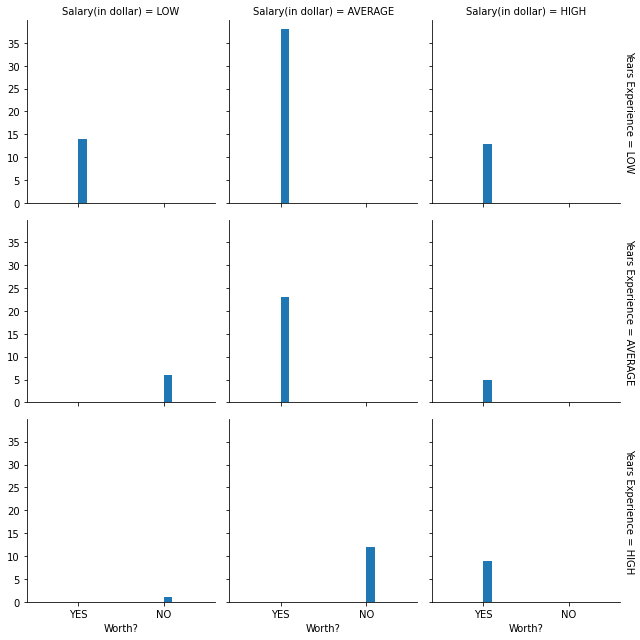

In [368]:
g = sns.FacetGrid(new_dataset_salary,margin_titles=True, col='Salary(in dollar)',col_order=['LOW','AVERAGE','HIGH'], row='Years Experience',row_order=['LOW','AVERAGE','HIGH'])
g = g.map(plt.hist, "Worth?")
plt.tight_layout()

---
THANKS
---
---